### These pre-processing codes are from:
    https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
%matplotlib inline

In [3]:
IMG_SIZE = 512

In [2]:
test_set=glob.glob("test/*")
train_set=glob.glob("train/*")
valid_set=glob.glob("valid/*")

In [4]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [5]:
def circle_crop(img, sigmaX=10):   
    """
    Create circular crop around image centre    
    """    
    
    img = cv2.imread(img)
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

In [6]:
def img_processing(path):
    img = circle_crop(path, sigmaX=10)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # 
    img = cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , IMG_SIZE/10) ,-4 ,128)# Ben Graham's 
    
    return img


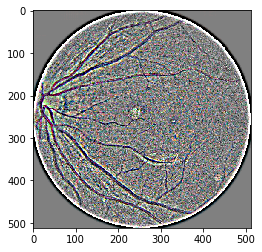

In [7]:
i=8
path=train_set[i]
img = img_processing(path)
plt.imshow(img, cmap='gray')

In [8]:
for path in test_set:
    img = img_processing(path)
    path = os.path.join('preprocessed',path)
    cv2.imwrite(path, img)

In [9]:
for path in train_set:
    img = img_processing(path)
    path = os.path.join('preprocessed',path)
    cv2.imwrite(path, img)

In [10]:
for path in valid_set:
    img = img_processing(path)
    path = os.path.join('preprocessed',path)
    cv2.imwrite(path, img)